# Data Science Project
## Hypothesis testing and Statistics Analysis

### Heart Disease Research Part I

In this project, you’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository and then cleaned for analysis.

#### Introduction and Goals
This project analyzes a dataset related to heart disease to identify patterns and insights. We will perform Exploratory Data Analysis (EDA), statistical hypothesis testing, and ETL tasks to derive actionable insights. The goal is to understand relationships between cholesterol levels,
fasting blood sugar, and the presence of heart disease.

The Data was downliaded from [Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)


### Workflow Process:
1. Loaded the dataset and performed data cleaning (if necessary).
2. Conducted exploratory data analysis (EDA) to identify patterns and trends.
3. Segmented the data based on the presence or absence of heart disease.
4. Conducted hypothesis testing to analyze cholesterol levels and fasting blood sugar.
5. Visualized key findings for better interpretation.
6. Performed statistical tests to validate findings.

##### We import required libreries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, binomtest, chi2_contingency

##### As usual, we need to load the data to get raw data to start with the Eda later

In [2]:
heart = pd.read_csv('heart_disease.csv')

#### Start wit the the EDA proccess

##### Let´s get a firsts overview of the dataset we have

In [3]:
# EDA: General Overview
print("Dataset Information:")
print(heart.info())
print("\nSummary Statistics:")
print(heart.describe())
print("\nMissing Values:")
print(heart.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    object 
 2   trestbps       303 non-null    float64
 3   chol           303 non-null    float64
 4   cp             303 non-null    object 
 5   exang          303 non-null    float64
 6   fbs            303 non-null    float64
 7   thalach        303 non-null    float64
 8   heart_disease  303 non-null    object 
dtypes: float64(6), object(3)
memory usage: 21.4+ KB
None

Summary Statistics:
              age    trestbps        chol       exang         fbs     thalach
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.438944  131.689769  246.693069    0.326733    0.148515  149.607261
std      9.038662   17.599748   51.776918    0.469794    0.356198   22.875003


##### Do some more exploratory analysis wiht visualizations

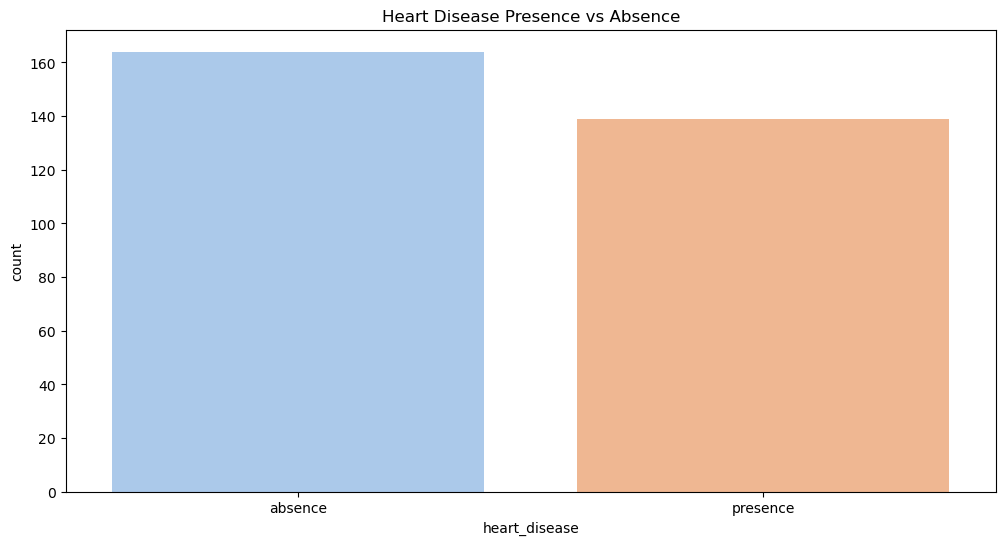

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(data=heart, x='heart_disease', hue='heart_disease', palette='pastel', legend=False)
plt.title('Heart Disease Presence vs Absence')
plt.show()

##### The countplot reveals that while the levels of individuals with and without heart disease are quite similar, there is a slightly higher number of people without heart disease in the dataset. This suggests that the dataset leans slightly toward healthier individuals.

##### We will now split the Data get subsets from it to better analysis

In [5]:
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']

#### Statistical Analysis
To quantify the relationship, we think it could be a goood insight to calculate the proportions. Later we will perform a statistical test too.

Proportions:

In [6]:
cholesterol_hd = heart['heart_disease'].value_counts(normalize=True)
print(f"\nPrportion of patients that do have and don´t have heart disease conditions")
print(cholesterol_hd)


Prportion of patients that do have and don´t have heart disease conditions
heart_disease
absence     0.541254
presence    0.458746
Name: proportion, dtype: float64


In [7]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(heart['chol'], heart['heart_disease'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 0.1037822292429721


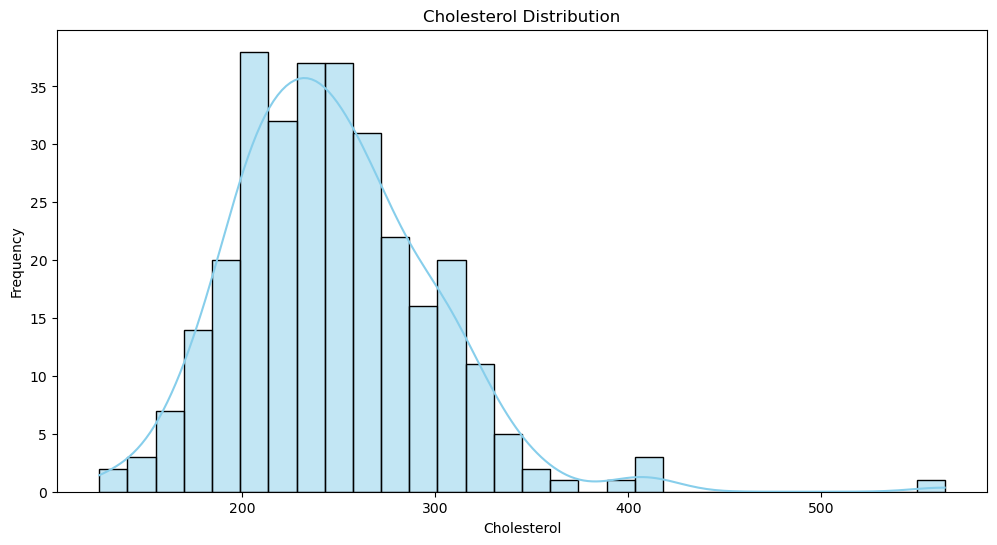

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(heart['chol'], bins=30, kde=True, color='skyblue')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

##### We are interestred mostly in the people who have diagnosis of cholesterol in them, to start looking for relationship between cholesterol and heartdisease

Start with the mean of this patients:

In [9]:
chol_hd = yes_hd.chol
mean_chol_hd = np.mean(chol_hd)
print(f"\nMean cholesterol level for patients with heart disease: {mean_chol_hd:.2f}")


Mean cholesterol level for patients with heart disease: 251.47


##### Do a Hypothesis Test for cholesterol patient
Lets do now a Hypothesis Test: Cholesterol

In [10]:
tstat_hd, pval_hd = ttest_1samp(chol_hd, 240)
print(f"One-sample t-test for cholesterol in heart disease patients: p-value = {pval_hd / 2:.5f}")

One-sample t-test for cholesterol in heart disease patients: p-value = 0.00354


##### Cholesterol Analysis (Absence)

In [11]:
chol_no_hd = no_hd.chol
mean_chol_no_hd = np.mean(chol_no_hd)
print(f"\nMean cholesterol level for patients without heart disease: {mean_chol_no_hd:.2f}")


Mean cholesterol level for patients without heart disease: 242.64


##### Do people with heart disease have high cholesterol levels (greater than or equal to 240 mg/dl) on average? We will import the function from scipy.stats so we can test the following null and alternative hypotheses:

- Null: People with heart disease have an average cholesterol level equal to 240 mg/dl
- Alternative: People with heart disease have an average cholesterol level that is greater than 240 mg/dl

We now run an Hypothesis Test ofr patiet with Cholesterol

In [12]:
tstat_no_hd, pval_no_hd = ttest_1samp(chol_no_hd, 240)
print(f"One-sample t-test for cholesterol in non-heart disease patients: p-value = {pval_no_hd / 2:.5f}")

One-sample t-test for cholesterol in non-heart disease patients: p-value = 0.26397


How many patients are there in this dataset?

In [13]:
num_patients = len(heart)
print(f"\nTotal number of patients: {num_patients}")


Total number of patients: 303


High Fasting Blood Sugar Patients


In [14]:
num_highfbs_patients = len(heart[heart.fbs == 1.0])
print(f"Number of patients with high fasting blood sugar (fbs = 1): {num_highfbs_patients}")

Number of patients with high fasting blood sugar (fbs = 1): 45


##### Now we cann calculate number of patients with fbs>120  adn then calculate 8% of sample size


In [15]:
num_highfbs_patients = np.sum(heart.fbs)
print(num_highfbs_patients)

print(0.08*num_patients)

45.0
24.240000000000002


#####  Perform now a Proportion Test 
We will now carry on witha Binominal Test

In [16]:
print(f"\n Chek if our data columns are integer numbers for the test")
print(f"num_highfbs_patients: {num_highfbs_patients}, type: {type(num_highfbs_patients)}")
print(f"num_patients: {num_patients}, type: {type(num_patients)}")


 Chek if our data columns are integer numbers for the test
num_highfbs_patients: 45.0, type: <class 'numpy.float64'>
num_patients: 303, type: <class 'int'>


In [17]:
from scipy.stats import binomtest
# we need to have

num_highfbs_patients = int(num_highfbs_patients) 
num_patients = int(num_patients)

# we run our test down below
expected_highfbs = 0.08 * num_patients
pval_highfbs = binomtest(num_highfbs_patients, num_patients, 0.08, alternative='greater').pvalue
print(f"P-value in scientific notation is: {pval_highfbs}")
print(f"P-value in a regular number expression is: {pval_highfbs:.20f}")

P-value in scientific notation is: 4.689471951448875e-05
P-value in a regular number expression is: 0.00004689471951448875


The p-value 4.689471951448875e-05 is expressed in scientific notation. To transform it into a standard decimal number, we can either calculate it manually or use Python's formatting. We will use this Python funcionality.

It indicates a highly significant result, far below typical thresholds like 0.05.

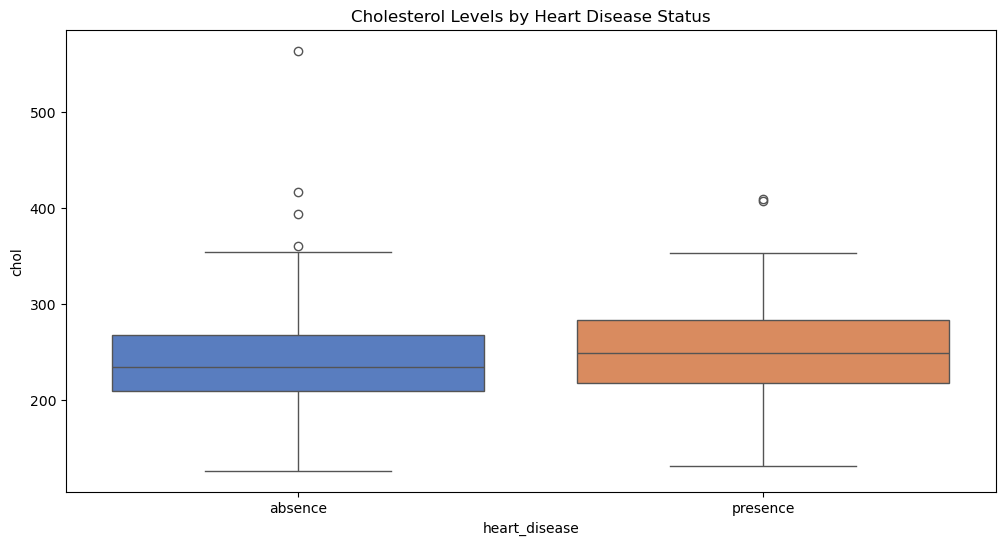

In [18]:
# Additional EDA
plt.figure(figsize=(12, 6))
sns.boxplot(data=heart, x='heart_disease',  hue='heart_disease', y='chol', palette='muted')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.show()

##### Correlation Matrix

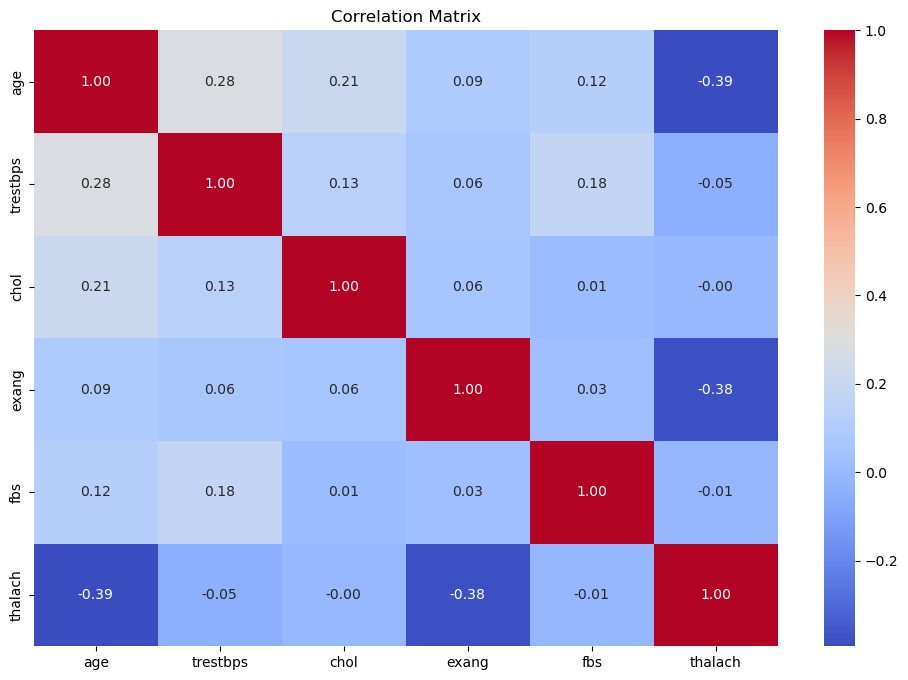

In [19]:
numeric_columns = heart.select_dtypes(include=[np.number]) # this is a subset for just select numerical columns or 
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#### Now we will perform a Ci Square Test to go over other variables regarding heart disease and blood sugar


In [20]:
contingency_table = pd.crosstab(heart['heart_disease'], heart['fbs'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"\nChi-square test for independence between heart disease and fasting blood sugar: p-value = {p:.5f}")


Chi-square test for independence between heart disease and fasting blood sugar: p-value = 0.78127


P_value for the CI Square Test is: 0.78127

### Conclusions:
1. Cholesterol levels are significantly higher in patients with heart disease compared to the population mean.
2. The proportion of patients with high fasting blood sugar is higher than the expected 8%.
3. Strong correlations were observed between certain numerical variables regarding a strong correlation between heart health problems and cholesterol or overweight.
4. Cholesterol and fasting blood sugar are key factors in identifying heart disease risk.
5. Additional insights from the chi-square test suggest a relationship between fasting blood sugar and heart disease.